# Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_Learning-USU/blob/main/Lectures%20and%20codes/Module%206-%20Deep%20Sequence%20Modeling/python/univariate_ts/Predictiong_stock_returns_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---


# Stock market price predictions

Can we predict stock market price with classical econometrics models or machine learning models?

Here is the detailed explanation: https://youtu.be/QcCDReclVu8

Documentation: 

1. **PyCaret**: https://pycaret.readthedocs.io/en/latest/index.html PyCaret3.0
2. **sktime** : https://www.sktime.net/en/stable/api_reference/forecasting.html

# Installation

Follow the steps here: https://pycaret.gitbook.io/docs/get-started/installation


In [2]:
#only if you want to run it in Google Colab: 
# for this chapter, we can install the light version of PyCaret as below. 

!pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycaret-3.0.1-py3-none-any.whl (483 kB)
  Using cached pyod-1.0.9.tar.gz (149 kB)
  Preparing metadata (setup.py) ... done
  Using cached category_encoders-2.6.1-py2.py3-none-any.whl (81 kB)
  Using cached importlib_metadata-6.6.0-py3-none-any.whl (22 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
  Using cached xxhash-3.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (212 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)
  Using cached schemdraw-0.15-py3-none-any.whl (106 kB)
  Using cached plotly_resampler-0.8.3.2.tar.gz (46 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━

In [1]:
# if you got a warning that you need to "RESTART RUNTIME", go ahead and press that button. 

# let's double ckeck the Pycaret version: 
from pycaret.utils import version
version()

'3.0.1'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Stock Dataset

In [50]:
stocks = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/yfinance.csv", index_col=0, header=[0,1])
stocks.head()

Adj Close                                                 \
                 AAPL         GLD       MSFT         QQQ         SPY   
Date                                                                   
2018-01-02  40.950497  125.150002  80.940392  153.123489  246.766678   
2018-01-03  40.943367  124.820000  81.317093  154.611298  248.327499   
2018-01-04  41.133541  125.459999  82.032768  154.881836  249.374115   
2018-01-05  41.601864  125.330002  83.049835  156.437332  251.035934   
2018-01-08  41.447350  125.309998  83.134598  157.045990  251.495041   

                                      Close                         ...  \
                 TSLA        USO       AAPL         GLD       MSFT  ...   
Date                                                                ...   
2018-01-02  21.368668  96.559998  43.064999  125.150002  85.949997  ...   
2018-01-03  21.150000  98.720001  43.057499  124.820000  86.349998  ...   
2018-01-04  20.974667  98.959999  43.257500  125.459999  87.110001  ...   
2018-01-05  21.105333  98.480003  43.750000  125.330002  88.190002  ...   
2018-01-08  22.427334  99.040001  43.587502  125.309998  88.279999  ...   

                  Open                           Volume                      \
                   SPY       TSLA        USO       AAPL       GLD      MSFT   
Date                                                                          
2018-01-02  267.839996  20.799999  96.559998  102223600  11762500  22483800   
2018-01-03  268.959991  21.400000  97.360001  118071600   7904300  26061400   
2018-01-04  271.200012  20.858000  98.639999   89738400   7329700  21912000   
2018-01-05  272.510010  21.108000  98.239998   94640000   5739900  23407100   
2018-01-08  273.309998  21.066668  98.480003   82271200   3566700  22113000   

                                                    
                 QQQ       SPY       TSLA      USO  
Date                                                
2018-01-02  32573300  86655700   65283000  1497588  
2018-01-03  29383600  90070400   67822500  2156150  
2018-01-04  24776100  80636400  149194500  1480988  
2018-01-05  26992300  83524000   68868000  1609888  
2018-01-08  23159100  57319200  147891000  1229225  

[5 rows x 42 columns]

In [51]:
# if you are working with Pandas, your first job should be changing the type of the index to datetime and then to period! This is a compatibility issue with other packages. 
stocks.index

Index(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-16',
       ...
       '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22',
       '2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30'],
      dtype='object', name='Date', length=1259)

In [52]:
stocks.index = pd.to_datetime(stocks.index).to_period('B')
stocks.index

PeriodIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
             '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
             '2018-01-12', '2018-01-16',
             ...
             '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
             '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
             '2022-12-29', '2022-12-30'],
            dtype='period[B]', name='Date', length=1259)

In [53]:
df = stocks['Adj Close'][['AAPL']]
df.head()

,AAPL
Date,
2018-01-02,40.950497
2018-01-03,40.943367
2018-01-04,41.133541
2018-01-05,41.601864
2018-01-08,41.447350


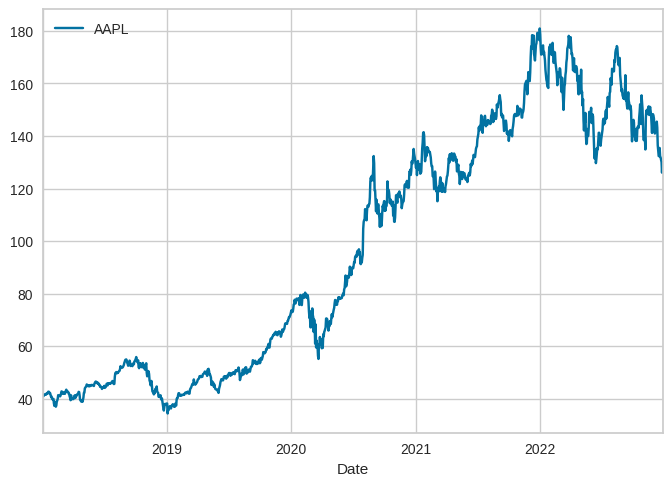

In [54]:
df.plot()
plt.show()

In [55]:
df.index

PeriodIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
             '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
             '2018-01-12', '2018-01-16',
             ...
             '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
             '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
             '2022-12-29', '2022-12-30'],
            dtype='period[B]', name='Date', length=1259)

In [56]:
idx = pd.period_range(min(df.index), max(df.index))
idx

PeriodIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
             '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
             '2018-01-12', '2018-01-15',
             ...
             '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22',
             '2022-12-23', '2022-12-26', '2022-12-27', '2022-12-28',
             '2022-12-29', '2022-12-30'],
            dtype='period[B]', length=1304)

We need to make sure that data has not any missing indices, otherwise Pycaret will complain:

Data has missing indices!
Many models, plotting, and testing functionality does not work with missing indices. Please add missing indices to data before passing to pycaret.

In [57]:
df.index.symmetric_difference(idx)

PeriodIndex(['2018-01-15', '2018-02-19', '2018-03-30', '2018-05-28',
             '2018-07-04', '2018-09-03', '2018-11-22', '2018-12-05',
             '2018-12-25', '2019-01-01', '2019-01-21', '2019-02-18',
             '2019-04-19', '2019-05-27', '2019-07-04', '2019-09-02',
             '2019-11-28', '2019-12-25', '2020-01-01', '2020-01-20',
             '2020-02-17', '2020-04-10', '2020-05-25', '2020-07-03',
             '2020-09-07', '2020-11-26', '2020-12-25', '2021-01-01',
             '2021-01-18', '2021-02-15', '2021-04-02', '2021-05-31',
             '2021-07-05', '2021-09-06', '2021-11-25', '2021-12-24',
             '2022-01-17', '2022-02-21', '2022-04-15', '2022-05-30',
             '2022-06-20', '2022-07-04', '2022-09-05', '2022-11-24',
             '2022-12-26'],
            dtype='period[B]')

In [58]:
df = df.reindex(idx, fill_value=np.nan)
df.tail()

,AAPL
2022-12-26,NaN
2022-12-27,130.029999
2022-12-28,126.040001
2022-12-29,129.610001
2022-12-30,129.929993


In [59]:
df = df.fillna(method = 'ffill')
df.tail(10)

,AAPL
2022-12-19,132.369995
2022-12-20,132.300003
2022-12-21,135.449997
2022-12-22,132.229996
2022-12-23,131.860001
2022-12-26,131.860001
2022-12-27,130.029999
2022-12-28,126.040001
2022-12-29,129.610001
2022-12-30,129.929993


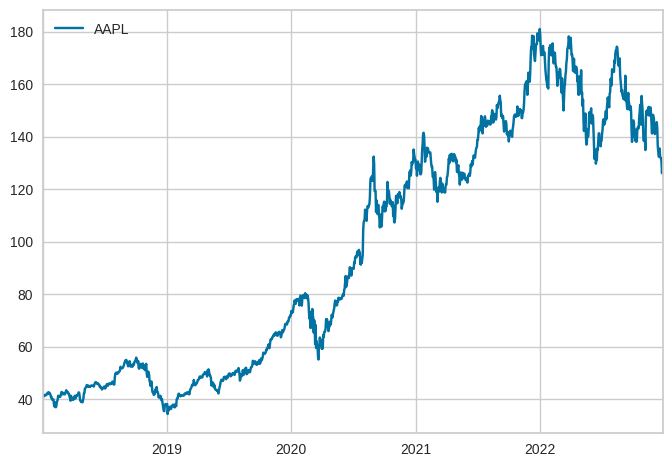

In [60]:
df.plot()
plt.show()

In [20]:
from pycaret.time_series import *

# Predicting Stock prices

In [21]:
exp = TSForecastingExperiment()
exp.setup(data = df, target='AAPL' ,coverage=0.90, fh=1)

,Description,Value
0,session_id,2698
1,Target,AAPL
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(1304, 1)"
5,Transformed data shape,"(1304, 1)"
6,Transformed train set shape,"(1303, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


Let's see which one is the best model?

In [22]:
exp.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


In [24]:
exp.compare_models(sort='mae') # exclude autoarima if you are running on a slower computer. 

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
arima,ARIMA,0.4967,0.3657,2.1985,2.1985,0.0170,0.0172,0.4900
stlf,STLF,0.6087,0.4480,2.6925,2.6925,0.0208,0.0208,0.0533
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.6592,0.4852,2.9150,2.9150,0.0229,0.0225,1.4200
catboost_cds_dt,CatBoost Regressor w/ Cond. Deseasonalize & Detrending,0.6682,0.4919,2.9559,2.9559,0.0231,0.0229,5.0367
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,0.6969,0.5130,3.0834,3.0834,0.0241,0.0238,0.2100
naive,Naive Forecaster,0.7074,0.5207,3.1300,3.1300,0.0244,0.0244,0.0533
ets,ETS,0.7138,0.5255,3.1582,3.1582,0.0246,0.0245,0.2467
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.7182,0.5286,3.1767,3.1767,0.0249,0.0245,0.7867
theta,Theta Forecaster,0.7205,0.5304,3.1879,3.1879,0.0249,0.0247,0.0633
exp_smooth,Exponential Smoothing,0.7245,0.5333,3.2056,3.2056,0.0250,0.0249,1.3933


Processing:   0%|          | 0/121 [00:00<?, ?it/s]

ARIMA(seasonal_order=(0, 1, 0, 9))

In [26]:
arima = exp.create_model('arima')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-12-26,0.2847,0.2096,1.2579,1.2579,0.0097,0.0096
1,2022-12-27,0.2463,0.1813,1.0896,1.0896,0.0086,0.0087
2,2022-12-28,0.9591,0.7061,4.2479,4.2479,0.0328,0.0333
Mean,NaT,0.4967,0.3657,2.1985,2.1985,0.0170,0.0172
SD,NaT,0.3273,0.2410,1.4508,1.4508,0.0111,0.0114


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [28]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1303
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 9)   Log Likelihood               -3186.133
Date:                           Wed, 17 May 2023   AIC                           6378.266
Time:                                   18:10:21   BIC                           6393.763
Sample:                               01-02-2018   HQIC                          6384.082
                                    - 12-29-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0717      0.080      0.891      0.373      -0.086       0.229
ar.L1          0.8800      0.010     89.075      0.000       0.861       0.899
sigma2         8.0482      0.212     37.933      0.000       7.632       8.464
===================================================================================
Ljung-Box (L1) (Q):                   4.63   Jarque-Bera (JB):               431.02
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):              11.85   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
final_model = exp.finalize_model(arima)

In [30]:
unseen_predictions = exp.predict_model(final_model, fh=10)
unseen_predictions

,y_pred
2023-01-02,130.2264
2023-01-03,133.6988
2023-01-04,130.7624
2023-01-05,130.6420
2023-01-06,130.8615
2023-01-09,129.2247
2023-01-10,125.4047
2023-01-11,129.1242
2023-01-12,129.5757
2023-01-13,129.9879


In [47]:
exp.plot_model(final_model  , plot='insample')

In [48]:
exp.plot_model(final_model  , plot='forecast', data_kwargs={'fh':20})

# Predicting Stock Returns

In [61]:
df['LogAAPL']= np.log(df['AAPL'])
df['DiffLogAAPL']= df['LogAAPL'].diff(1)
df.dropna(inplace=True)
df.drop(['AAPL','LogAAPL'], axis=1, inplace=True)
df.head()

,DiffLogAAPL
2018-01-03,-0.000174
2018-01-04,0.004634
2018-01-05,0.011321
2018-01-08,-0.003721
2018-01-09,-0.000115


In [99]:
exp1 = TSForecastingExperiment()
exp1.setup(data = df, target='DiffLogAAPL' ,coverage=0.90, fh=1)

,Description,Value
0,session_id,6106
1,Target,DiffLogAAPL
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(1303, 1)"
5,Transformed data shape,"(1303, 1)"
6,Transformed train set shape,"(1302, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [100]:
exp1.compare_models(exclude='auto_arima')

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
stlf,STLF,0.8984,0.6656,0.0184,0.0184,0.7191,0.8934,0.0933
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.9855,0.7302,0.0202,0.0202,0.9175,1.4129,0.3400
snaive,Seasonal Naive Forecaster,0.9955,0.7375,0.0204,0.0204,0.7286,0.8462,0.0467
catboost_cds_dt,CatBoost Regressor w/ Cond. Deseasonalize & Detrending,0.9959,0.7378,0.0204,0.0204,0.9739,1.3121,5.1167
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.0175,0.7538,0.0208,0.0208,0.9357,1.5681,0.7200
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1.0899,0.8075,0.0223,0.0223,1.0804,1.3888,1.8600
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.1745,0.8701,0.0240,0.0240,1.0879,1.6712,0.8233
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,1.1775,0.8724,0.0241,0.0241,1.1262,1.5842,0.8967
polytrend,Polynomial Trend Forecaster,1.1955,0.8857,0.0245,0.0245,1.0067,1.9952,0.0533
theta,Theta Forecaster,1.1955,0.8857,0.0245,0.0245,1.0067,1.9952,0.0867


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

STLForecaster(sp=9)

In [101]:
arima = exp1.create_model('arima')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2022-12-26,0.0729,0.0540,0.0015,0.0015,0.1068,0.1014
1,2022-12-27,0.8303,0.6151,0.0170,0.0170,0.5453,0.4285
2,2022-12-28,2.1221,1.5722,0.0434,0.0434,1.5549,2.0000
Mean,NaT,1.0084,0.7471,0.0206,0.0206,0.7357,0.8433
SD,NaT,0.8460,0.6268,0.0173,0.0173,0.6063,0.8287


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [107]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1302
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 9)   Log Likelihood                2806.464
Date:                           Wed, 17 May 2023   AIC                          -5606.927
Time:                                   18:59:24   BIC                          -5591.433
Sample:                               01-03-2018   HQIC                         -5601.112
                                    - 12-29-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -5.4e-05      0.001     -0.070      0.944      -0.002       0.001
ar.L1         -0.0423      0.022     -1.966      0.049      -0.085      -0.000
sigma2         0.0008   2.11e-05     36.129      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               225.46
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             0.00
Prob(H) (two-sided):                  0.86   Kurtosis:                         5.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
final_model = exp1.finalize_model(arima)

In [103]:
unseen_predictions = exp1.predict_model(final_model, fh=10)
unseen_predictions

,y_pred
2023-01-02,-0.0013
2023-01-03,0.0235
2023-01-04,-0.0241
2023-01-05,-0.0028
2023-01-06,-0.0000
2023-01-09,-0.0140
2023-01-10,-0.0312
2023-01-11,0.0279
2023-01-12,0.0024
2023-01-13,-0.0014


In [104]:
exp1.plot_model(final_model  , plot='insample')

In [106]:
exp1.plot_model(final_model  , plot='forecast', data_kwargs={'fh':30})